In [1]:
## Imports
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Options
pd.set_option("max_colwidth", None)

In [2]:
## Read data
train_essays = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
test_essays = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/test_essays.csv")
train_prompts = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv")
ai_generated_train_essays = pd.read_csv("/kaggle/input/llm-generated-essays/ai_generated_train_essays.csv")
ai_generated_train_essays_gpt4 = pd.read_csv("/kaggle/input/llm-generated-essays/ai_generated_train_essays_gpt-4.csv")
print("Train essay", train_essays.shape)
print("Test essay", test_essays.shape)
print("Train prompts", train_prompts.shape)
print("Train essays AI generated", ai_generated_train_essays.shape)
print("Train essays AI genearted GPT4", ai_generated_train_essays_gpt4.shape)
train_essays.head()

Train essay (1378, 4)
Test essay (3, 3)
Train prompts (2, 4)
Train essays AI generated (500, 4)
Train essays AI genearted GPT4 (200, 4)


id  prompt_id  \
0  0059830c          0   
1  005db917          0   
2  008f63e3          0   
3  00940276          0   
4  00c39458          0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [3]:
## Merge datasets
train_essays = pd.concat([train_essays, ai_generated_train_essays, ai_generated_train_essays_gpt4])
train_essays.shape

(2078, 4)

In [4]:
train_prompts

prompt_id                       prompt_name  \
0          0                   Car-free cities   
1          1  Does the electoral college work?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             instructions  \
0                                                                                        Write an explanatory essay to inform fellow citizens about the advantages of limiting car usage. Your essay must be based on ideas and information that can be found in the passage set. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your essay in the space provided.   
1  Write a letter to your state senator in which you argue in favor of keeping the Electoral College or changing to election by popular vote for the president of the United States. Use the information from the texts in your essay. Manage your time carefully so that you can read the passages; plan your response; write your response; and revise and edit your response. Be sure to include a claim; address counterclaims; use evidence from multiple sources; and avoid overly relying on one source. Your response should be in the form of a multiparagraph essay. Write your response in the space provided.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Distribution of Generated examples

In [5]:
train_essays.generated.value_counts()

generated
0    1375
1     703
Name: count, dtype: int64

### Distribution of Prompt Ids

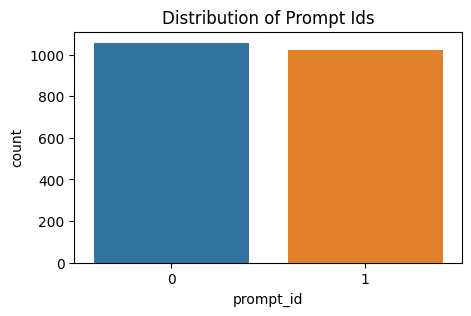

In [6]:
plt.figure(figsize=(5,3))
plt.title("Distribution of Prompt Ids")
sns.countplot(train_essays, x="prompt_id");

### Number of tokens in Essays

In [7]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) # remove any square brackets in the string
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove any urls in the string
    text = re.sub('<.*?>+', '', text) # remove and angle brackets <> in the string
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove any predefined string punctuations from the string
    text = re.sub('\n', '', text) # remove any new line character \n from the string
    text = re.sub('\w*\d\w*', '', text) # remove any words that contains numbers
    return text

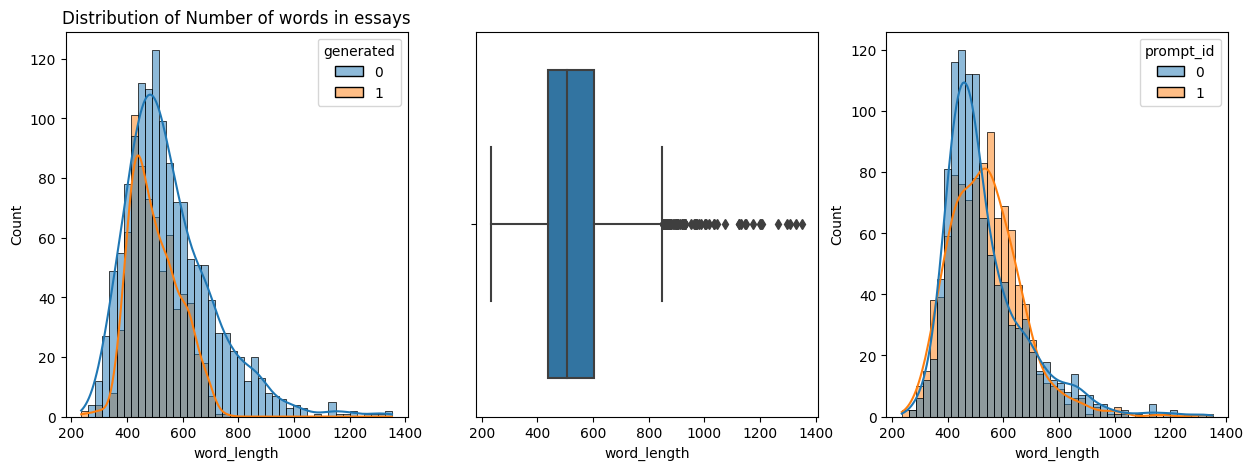

In [8]:
train_essays["word_length"] = train_essays.text.apply(lambda t: len(clean_text(t.lower()).split(" ")))
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Distribution of Number of words in essays")
sns.histplot(train_essays, x="word_length", kde=True, hue="generated")
plt.subplot(1,3,2)
sns.boxplot(train_essays, x="word_length")
plt.subplot(1,3,3)
sns.histplot(train_essays, x="word_length", kde=True, hue="prompt_id");